## This Jupyter Notebook will be used to perform the Coursera Capstone Project

In [1]:
# %config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/personale/MACHINELEARNING/IBM/capstone/Data-Collisions.csv')
df.head(2)
# df['SEGLANEKEY'].unique()
# sns.scatterplot(data = df, x = 'REPORTNO', y= 'SEVERITYCODE')
# df['ROADCOND'].value_counts(dropna=False)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


### Transform of date column 

In [3]:
df['WEEKDAY'] = pd.to_datetime(df['INCDATE']).dt.weekday
df['MONTH'] = pd.to_datetime(df['INCDATE']).dt.month
df['MONTHDAY'] = pd.to_datetime(df['INCDATE']).dt.day
# df.groupby('WEEKDAY')['SEVERITYCODE'].value_counts(normalize= True)
# sns.countplot(data = df, x = 'WEEKDAY', hue = 'SEVERITYCODE')

# WORK WITH GEODATA

In [4]:
# df['Y'].isnull().value_counts()
# df['X'].isnull().value_counts()
co = df.copy(deep=True)
co = co[['X', 'Y']]
# co = co.drop_duplicates()
co = co.dropna()
co['Y'].isnull().values.any()

False

In [5]:
# conda install -c conda-forge folium
import folium
m = folium.Map(location=[47.70314032, -122.323148],zoom_start= 11 )


In [6]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(co.Y, co.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
m = m.add_child(incidents)

In [7]:
# import json
# a= requests.get( 'https://github.com/seattleflu/seattle-geojson/tree/master/seattle_geojsons/2016_seattle_pumas.json')
# a
import wget
dist = wget.download('https://github.com/seattleio/seattle-boundaries-data/tree/master/data/city-council-districts.geojson')
dist

&#39;city-council-districts (9).geojson&#39;

In [8]:
import json 
import shapely
from shapely.geometry import Point, Polygon
import shapely.speedups
import geopandas

gdf = geopandas.GeoDataFrame(
    co, geometry=geopandas.points_from_xy(co.X, co.Y))

shapely.speedups.enable()

a = open('D:/personale/MACHINELEARNING/IBM/python for machine learning/Final Project/seattle_districts.json')

f = json.load(a)


df['DISTRICT'] = np.nan

for i in range(7):
    distr= f['features'][i]['geometry']['coordinates']
    d = []
    for j in range(len(distr[0])):
        d.append(distr[0][j]) 
    
    D = Polygon(d)

    r= np.where(gdf['geometry'].within(D))[0]
    df['DISTRICT'][r] = i


In [9]:
dis = {'DISTRICT': [1,2,3,4,5,6,7],
        'TOTAL': [6027,11641,8975,6047,6043,6233,11111]
        }
df1 = pd.DataFrame(dis, columns = ['DISTRICT', 'TOTAL'])

In [10]:
df.groupby('DISTRICT')['SEVERITYCODE'].value_counts()

DISTRICT  SEVERITYCODE
0.0       1               14249
          2                6027
1.0       1               27557
          2               11641
2.0       1               21220
          2                8975
3.0       1               14227
          2                6047
4.0       1               13789
          2                6043
5.0       1               15002
          2                6233
6.0       1               25936
          2               11111
Name: SEVERITYCODE, dtype: int64

In [11]:
m = folium.Map(location=[47.70314032, -122.323148],zoom_start= 11 )

m.choropleth(
    geo_data=f,
    data=df1,
    columns=['DISTRICT', 'TOTAL'],
    key_on='feature.properties.district',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.5,
    legend_name='Accident'
)
m

&lt;folium.folium.Map at 0x2d7fe950&gt;

In [12]:
f['features'][0]['properties']
# f.features

{&#39;district&#39;: 1}

# DATA CLEANING 

In [13]:
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 
'STATUS', 'INCDATE', 'INCDTTM', 'SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYCODE.1', 'SEVERITYDESC', 'LOCATION','INTKEY', 'ST_COLCODE', 'SDOT_COLCODE',
'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND'], axis = 1, inplace = True)


### Take Care of nan Values for the column 'COLLISIONTYPE' 
In this phase the columns 'SDOT_COLDESC' 'ST_COLDESC' are eliminated and their values are taken in account and grouped into the 'COLLISIONTYPE' column 

In [14]:
# df2 = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)
r, _ = np.where(df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].isna())
r = np.unique(r).tolist()



In [15]:
# df['SDOT_COLDESC'].unique()
# df.groupby('SDOT_COLDESC')['SEVERITYCODE'].value_counts(normalize = True )
# df2[df2['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK OBJECT IN ROAD']
# df = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)

mask_other = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD')

mask_angles = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE')

mask_parked = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END') & (df['ST_COLDESC'] == 'One parked--one moving')

mask_rear = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END')

mask_pedestrian = (df['SDOT_COLDESC']=='MOTOR VEHCILE STRUCK PEDESTRIAN') & \
    (df['COLLISIONTYPE'].isnull())

mask_cycles = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE') & (df['COLLISIONTYPE'].isnull())

mask_parked1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT      SIDE SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'Y') 

mask_sideswipe = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'N')

mask_other1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE RAN OFF ROAD - NO COLLISION') &  (df['COLLISIONTYPE'].isnull())

mask_other2 = (df['SDOT_COLDESC'] == 'NOT ENOUGH INFORMATION / NOT APPLICABLE') & \
(df['COLLISIONTYPE'].isnull())

mask_other3 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT') & (df['COLLISIONTYPE'].isnull())

mask_parked2 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'Y')

mask_other4 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'N')

mask_other5 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE OVERTURNED IN ROAD') & \
     (df['COLLISIONTYPE'].isnull())

mask_sideswipe1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE \
# SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) 

mask_cycles1 = \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE')  | \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END')            | \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE') | \
(df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE')| \
(df['SDOT_COLDESC']=='PEDALCYCLIST OVERTURNED IN ROAD')                       & \
(df['COLLISIONTYPE'].isnull()) 

mask_parked3 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE')   | \
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE') | \
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END')           | \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE')   & \
(df['COLLISIONTYPE'].isnull()) 

mask_other6 =\
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT') | \
(df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK TRAIN') & \
(df['COLLISIONTYPE'].isnull())

mask_parked4 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE') & \
(df['HITPARKEDCAR'] == 'Y')  & \
(df['COLLISIONTYPE'].isnull()) 

mask_sideswipe2 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE') & \
(df['HITPARKEDCAR'] == 'N')  & \
(df['COLLISIONTYPE'].isnull()) 

df['COLLISIONTYPE'][mask_other] = 'Other'
df['COLLISIONTYPE'][mask_angles] = 'Angles'
df['COLLISIONTYPE'][mask_parked] = 'Parked Car'
df['COLLISIONTYPE'][mask_rear] = 'Rear Ended'
df['COLLISIONTYPE'][mask_pedestrian] = 'Pedestrian'
df['COLLISIONTYPE'][mask_cycles] = 'Cycles'
df['COLLISIONTYPE'][mask_parked1] = 'Parked'
df['COLLISIONTYPE'][mask_sideswipe] = 'Sideswipe'
df['COLLISIONTYPE'][mask_other1] = 'Other'
df['COLLISIONTYPE'][mask_other2] = 'Other'
df['COLLISIONTYPE'][mask_other3] = 'Other'
df['COLLISIONTYPE'][mask_parked2] = 'Parked Car'
df['COLLISIONTYPE'][mask_other4] = 'Other'
df['COLLISIONTYPE'][mask_other5] = 'Other'
df['COLLISIONTYPE'][mask_sideswipe1] = 'Sideswipe'
df['COLLISIONTYPE'][mask_cycles1] = 'Cycles'
df['COLLISIONTYPE'][mask_parked3] = 'Parked Car'
df['COLLISIONTYPE'][mask_other6] = 'Other'
df['COLLISIONTYPE'][mask_parked4] = 'Parked Car'
df['COLLISIONTYPE'][mask_sideswipe2] = 'Sideswipe'

r= np.where(df['COLLISIONTYPE'].isna())[0]
r = np.unique(r).tolist()
# len(r)
#  df2.iloc[r,:]
# df2['SDOT_COLDESC'][r]
# df2['COLLISIONTYPE_1'] = df2['COLLISIONTYPE'].apply(lambda x: 'Other' \
#     if (x.isnull()) & \
#   (df2['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD'))

### Last phase of Data Cleaning
Now that the nan have been taken care of the next step is to remove the columns not udeful anymore and finalize the preparation of the data for the modeling phase

In [16]:
mask_block= (df['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)') | \
    (df['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)') | \
    (df['JUNCTIONTYPE'] == 'Ramp Junction') | \
    (df['JUNCTIONTYPE'] == 'Driveway Junction') | \
    (df['JUNCTIONTYPE'] == 'Unknown') & \
    (df['ADDRTYPE'].isnull())

mask_intersection= (df['JUNCTIONTYPE'] == 'At Intersection (intersection related)') | \
       (df['JUNCTIONTYPE'] == 'At Intersection (but not related to intersection)') \
        & (df['ADDRTYPE'].isnull())


df['ADDRTYPE'][mask_block] = 'Block'
df['ADDRTYPE'][mask_intersection] = 'Intersection'

In [17]:
r, _ = np.where(df[['ADDRTYPE']].isna())
r = np.unique(r).tolist()

ad = df['ADDRTYPE'].value_counts(normalize = True)

l = len(r)

B = int(np.rint(l* ad[0]))
I = int(np.rint(l * ad[1]))
A = int(np.rint(l * ad[2]))

df.fillna('Block', limit = B, inplace = True)
df.fillna('Intersection', limit = I, inplace = True)
df.fillna('Alley', limit = A, inplace = True)



In [18]:
def fill_na_by_percentage(df, col):
    r, _ = np.where(df[[col]].isna())
    r = np.unique(r).tolist()
    l = len(r)
    if l != 0:
        ad = df[col].value_counts(normalize = True)
        # print(ad)
        for i in range(len(ad)):
            L = int(np.floor(l * ad[i]))
            try:
                df[col].fillna(ad.keys()[i], limit = L, inplace = True )
            except:
                r, _ = np.where(df[[col]].isna())
                r = np.unique(r).tolist()
                l = len(r)
                if l > 0:
                    df[col].fillna(ad.keys()[i], limit = l, inplace = True )
                print('Function terminated')
                return
    else:
        print('No nan values in column')
        return

lista = ['LIGHTCOND', 'ROADCOND', 'UNDERINFL', 'WEATHER', 'ADDRTYPE']

for i in lista:
    fill_na_by_percentage(df,i)
# df['ROADCOND'].value_counts(dropna = False)

Function terminated
Function terminated
Function terminated
Function terminated
No nan values in column


In [19]:
# df.drop(['JUNCTIONTYPE', 'SDOT_COLDESC', 'ST_COLDESC'],inplace = True, axis = 1)
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 19 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         194673 non-null object
COLLISIONTYPE    194673 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     189940 non-null object
SDOT_COLDESC     194673 non-null object
UNDERINFL        194673 non-null object
WEATHER          194673 non-null object
ROADCOND         194673 non-null object
LIGHTCOND        194673 non-null object
ST_COLDESC       191365 non-null object
HITPARKEDCAR     194673 non-null object
WEEKDAY          194673 non-null int64
MONTH            194673 non-null int64
MONTHDAY         194673 non-null int64
DISTRICT         189653 non-null object
dtypes: int64(8), object(11)
memory usage: 20.1+ MB


In [20]:
# df['WEATHER'].unique()
df['WEATHER'].replace(to_replace=('Block','Alley', 'Intersection'), value= 'Unknown', inplace = True)

# df['ROADCOND'].unique()
df['ROADCOND'].replace(to_replace=('Block','Alley', 'Intersection'), value= 'Unknown', inplace = True)

df['LIGHTCOND'].replace(to_replace=('Block','Alley', 'Intersection'), value= 'Unknown', inplace = True)


In [21]:
df['UNDERINFL'].replace(to_replace=('Y','N','1','0'), value=(1,0,1,0),inplace=True)

df['UNDERINFL'].replace(to_replace=('Intersection', 'Block', 'Alley'), value= np.nan, inplace=True)


df['UNDERINFL'].fillna(0, limit= 1543, inplace= True )
df['UNDERINFL'].fillna(1, inplace= True)

&lt;seaborn.axisgrid.FacetGrid at 0x3f469d90&gt;

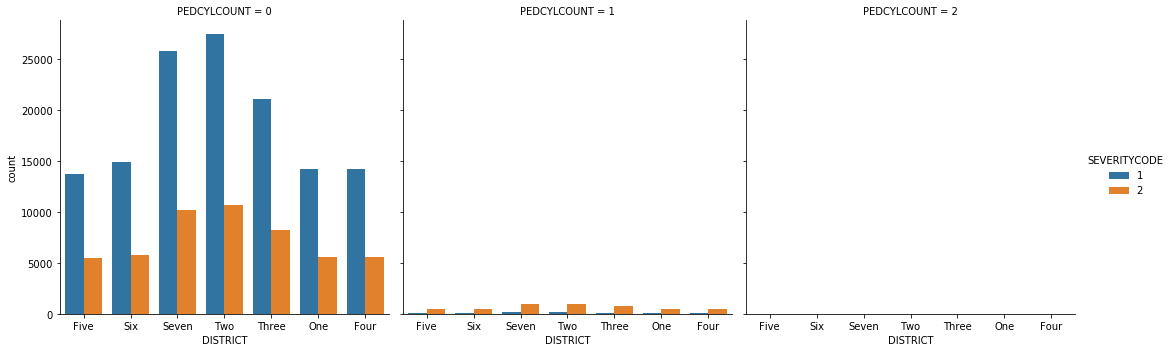

In [378]:
# df = pd.get_dummies(df, columns= ['COLLISIONTYPE'])
# df = pd.get_dummies(df, columns= ['ADDRTYPE'])
# df = pd.get_dummies(df, columns= ['WEATHER'])
# df = pd.get_dummies(df, columns= ['LIGHTCOND'])
# df = pd.get_dummies(df, columns= ['ROADCOND'])
# df.groupby(['DISTRICT','WEEKDAY'])['SEVERITYCODE'].value_counts()
# sns.catplot(x='DISTRICT', hue='SEVERITYCODE', col='PEDCYLCOUNT', data=df, kind='count')

In [381]:
# df['HITPARKEDCAR'].replace(to_replace=('Y','N'), value=(1,0), inplace=True)
# df['WEEKDAY'].replace(to_replace=(0,1,2,3,4,5,6), value=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), inplace=True)
# df = pd.get_dummies(df, columns= ['WEEKDAY'])

# df['DISTRICT'].replace(to_replace=('Block', 'Intersection',
#        'Alley'), value = np.nan,inplace=True)
# df['DISTRICT'].value_counts(dropna=False)
# df['PERSONCOUNT'].replace(to_replace=('Five'), value=('Five or more'),inplace=True)
# df['VEHCOUNT'].value_counts()
# df['PEDCYLCOUNT'][df['PEDCYLCOUNT']>3] = 3
# df['PERSONCOUNT'].replace(to_replace=('Five'), value=('Five or more'),inplace=True)
# df['PEDCYLCOUNT'].replace(to_replace=(0,1,2,3), value=('Zero','One','Two','Three'),inplace=True)
# 'Zero','One','Two','Three','Four','Five', 'Six', 'Seven', 'Eight','Nine or more'
temp = df.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts()
# ('One','Two','Three','Four','Five','Six','Seven')
# df2 = pd.DataFrame(temp)
temp

PEDCYLCOUNT  SEVERITYCODE
One          2                 4762
             1                  679
Two          2                   43
Zero         1               135806
             2                53383
Name: SEVERITYCODE, dtype: int64

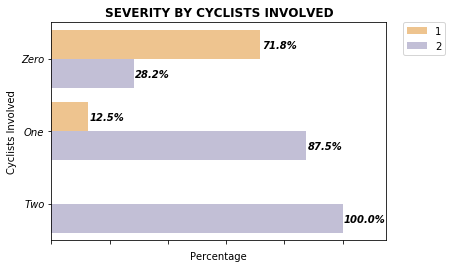

In [389]:
temp= df.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize=True).mul(100).rename('percentage').reset_index().sort_index()
# temp
# figsize=(6,6)
plt.figure()
chart = sns.barplot(data = temp, x = 'percentage', y= 'PEDCYLCOUNT', hue= 'SEVERITYCODE', linewidth=2, palette='PuOr', order=['Zero', 'One','Two'])
chart.set_title('SEVERITY BY CYCLISTS INVOLVED', weight='bold')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_yticklabels(), rotation=0, horizontalalignment='right', style='italic')
chart.set_xlabel('Percentage')
chart.set_ylabel('Cyclists Involved')
chart.set_xbound(upper=115)
# chart.set_ybound(lower=-1,upper=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

total=100
new_value=0.5
for p in chart.patches:
        percent = '{:.1f}%'.format(100 * p.get_width()/total)
        x =  p.get_width() + .5
        y = p.get_y() + p.get_height() - .15 
        chart.annotate(percent, (x, y), fontsize=10, color='k', weight='bold', style='italic')

# Model Construction Phase

In [26]:
# from sklearn.model_selection import train_test_split
# df.drop(['SDOT_COLDESC','JUNCTIONTYPE','ST_COLDESC'],inplace=True,axis= 1)

# X = df.copy(deep= True)
# X.to_csv(path_or_buf= 'D:/personale/MACHINELEARNING/IBM/capstone/X.csv')
# X.drop('SEVERITYCODE', axis= 1, inplace= True)

# y = df['SEVERITYCODE']

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [27]:
# from sklearn import metrics,tree
# from sklearn.tree import DecisionTreeClassifier
# Tree = DecisionTreeClassifier(criterion="gini", max_depth = 6)
# Tree.fit(X_train,y_train)

# tree.plot_tree(Tree)
# predTree = Tree.predict(X_test)

# accuracy = metrics.accuracy_score(y_test, predTree)

# print('tree accuracy: ', accuracy)


In [28]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors = 20).fit(X_train,y_train)
# yhat = neigh.predict(X_test)

# accuracy = metrics.accuracy_score(y_test, yhat)

# print('neigh accuracy: ', accuracy)


In [29]:
# from sklearn import svm
# clf = svm.SVC(kernel='rbf')

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# X_train= X_train.to_numpy()
# X_test= X_test.to_numpy()
# y_train= y_train.to_numpy()
# y_test= y_test.to_numpy()

# clf.fit(X_train, y_train) 

# yhat = clf.predict(X_test)

# accuracy = metrics.accuracy_score(y_test, yhat)

# print('SVM accuracy: ', accuracy)

In [30]:
# cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4','Toyota Corolla'],
#         'Price': [22000,25000,27000,35000,25000]
#         }
# df1 = pd.DataFrame(cars, columns = ['Brand', 'Price'])
# # df1['Brand'].replace(to_replace= ('Toyota Corolla', 'Ford Focus'), value = ('Toyota', 'Gay') , inplace = True)
# df1.drop_duplicates()
# df1
# df1 = pd.get_dummies(df1, columns = ['Brand'])